### Global Power Plant Database
Problem Statement:

Description-

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',500)

In [370]:
data = pd.read_csv('database_IND.csv')

In [371]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [372]:
data.shape

(907, 27)

In [373]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Data preprocessing

In [374]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [375]:
data.drop(columns=['other_fuel1','other_fuel2',
       'other_fuel3', 'commissioning_year','owner','wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013','generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],axis=1,inplace=True)

In [376]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [377]:
data.shape

(907, 16)

In [378]:
data.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [379]:
data.reset_index(inplace=True)

In [380]:
data.head()

,index,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [381]:
data.drop(columns=['index'],inplace=True)

In [382]:
data.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
80,IND,India,BHANDARA VARAM,WRI1019944,10.0,21.0813,79.7708,Biomass,Varam Pvt ltd,http://www.bloomberg.com/profiles/companies/41...,WRI,NaN,NaN,NaN,NaN,NaN
752,IND,India,Sadeipali - REHPL Solar Power Plant,WRI1026201,1.0,20.7325,83.4632,Solar,Raajratna Energy Holdings Private Limited (REHPL),http://rehpl.co.in,Industry About,NaN,NaN,NaN,NaN,NaN
450,IND,India,MAHATMA SUGAR,WRI1019966,15.0,20.8558,78.5814,Biomass,Mahatma Power ltd,https://www.zaubacorp.com/company/MAHATMA-SUGA...,WRI,NaN,NaN,NaN,NaN,NaN
800,IND,India,TEHRI ST -1,IND0000451,1000.0,30.3787,78.4795,Hydro,Central Electricity Authority,http://www.cea.nic.in/,WRI,3008.43225,3085.495,3130.5884,3065.5353,3156.2196
115,IND,India,Bap - GIS 3 Solar Power Plant,WRI1026116,10.0,27.3893,72.3134,Solar,Sembcorp,http://www.sembcorp.com/en/media/features?Id=9179,Industry About,NaN,NaN,NaN,NaN,NaN


In [383]:
data['country_long'].unique()

array(['India'], dtype=object)

In [384]:
data['country'].unique()

array(['IND'], dtype=object)

In [385]:
data.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)

In [386]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [387]:
data['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
CleanEnerg teLeanenergy                        1
Shri Malaprabha ssk                            1
Hiraco India                                   1
Rswm Rswm ltd                                  1
Mono Steel (India) Ltd                         1
Name: source, Length: 191, dtype: int64

In [388]:
data['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

#### source column can be changed to categorical column using label encoder

In [389]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [390]:
data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [391]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [392]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

#### primary fuel and geolocation_source can also be changed to categorical column using label encoder

#### lattitude and longitude can be helpful for predicting any city but power plant position can vary according to different reason so better to drop them

In [393]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [394]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [395]:
data.dropna(inplace=True)

In [396]:
data.shape

(385, 11)

In [397]:
from scipy.stats import norm
data['longitude']=data['longitude'].astype(float)
data['latitude']=data['latitude'].astype(float)
data.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,Central Electricity Authority,WRI,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,Central Electricity Authority,WRI,157.558250,152.1952,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,Hydro,Central Electricity Authority,WRI,674.391100,721.3352,675.724400,679.594950,579.318850


In [398]:
import reverse_geocoder as rg
import pprint
data00=[]
def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return(result)
if __name__=="__main__":
    coordinates=list(zip(data['latitude'],data['longitude']))
    data12=reverseGeocode(coordinates)
    data00.append(data12)

new_data=pd.DataFrame(data00).transpose()

#### using droping nan rows because we cant impute ourself this element of our data frame so, its better to  remove it,

In [399]:
data.shape

(385, 11)

In [400]:
data12

[{'lat': '23.83463',
  'lon': '91.36614',
  'name': 'Ranir Bazar',
  'admin1': 'Tripura',
  'admin2': 'West Tripura',
  'cc': 'IN'},
 {'lat': '22.0253',
  'lon': '82.42689',
  'name': 'Akaltara',
  'admin1': 'Chhattisgarh',
  'admin2': 'Janjgir-Champa',
  'cc': 'IN'},
 {'lat': '23.63371',
  'lon': '68.90192',
  'name': 'Dayapar',
  'admin1': 'Gujarat',
  'admin2': 'Kachchh',
  'cc': 'IN'},
 {'lat': '10.32691',
  'lon': '76.95116',
  'name': 'Valparai',
  'admin1': 'Tamil Nadu',
  'admin2': 'Coimbatore',
  'cc': 'IN'},
 {'lat': '32.2574',
  'lon': '77.17481',
  'name': 'Manali',
  'admin1': 'Himachal Pradesh',
  'admin2': 'Kulu',
  'cc': 'IN'},
 {'lat': '16.18673',
  'lon': '75.69614',
  'name': 'Bagalkot',
  'admin1': 'Karnataka',
  'admin2': 'Bagalkot',
  'cc': 'IN'},
 {'lat': '23.10344',
  'lon': '81.69083',
  'name': 'Anuppur',
  'admin1': 'Madhya Pradesh',
  'admin2': 'Anuppur',
  'cc': 'IN'},
 {'lat': '20.93333',
  'lon': '77.75',
  'name': 'Amravati',
  'admin1': 'Maharashtra',
 

In [401]:
data['state']=new_data[0].apply(lambda x:x.get('admin1'))

data['Country']=new_data[0].apply(lambda x:x.get('cc'))

In [402]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,state,Country
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.7470,886.004428,663.774500,626.239128,Tamil Nadu,IN
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Himachal Pradesh,IN
5,250.0,23.7689,68.6447,Coal,Central Electricity Authority,WRI,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Karnataka,IN
6,60.0,10.4547,77.0078,Hydro,Central Electricity Authority,WRI,157.558250,152.1952,61.421350,89.629600,48.327150,Madhya Pradesh,IN
7,192.0,32.2258,77.2070,Hydro,Central Electricity Authority,WRI,674.391100,721.3352,675.724400,679.594950,579.318850,Maharashtra,IN


In [403]:
data.drop(columns=['latitude','longitude'],axis=1,inplace=True)

### Encoding

In [404]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [405]:
data['source'] = lab_enc.fit_transform(data['source'])
data['primary_fuel'] = lab_enc.fit_transform(data['primary_fuel'])
data['geolocation_source'] = lab_enc.fit_transform(data['geolocation_source'])
data['state']=lab_enc.fit_transform(data['state'])
data['Country']=lab_enc.fit_transform(data['Country'])

In [406]:
data.head()

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,state,Country
3,135.0,1,0,0,617.789264,843.7470,886.004428,663.774500,626.239128,21,0
4,1800.0,0,0,0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,7,0
5,250.0,0,0,0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,9,0
6,60.0,2,0,0,157.558250,152.1952,61.421350,89.629600,48.327150,12,0
7,192.0,2,0,0,674.391100,721.3352,675.724400,679.594950,579.318850,13,0


In [407]:
data.describe()

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,state,Country
count,385.000000,385.000000,385.0,385.0,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,640.274743,1.090909,0.0,0.0,2510.685975,2636.161828,2663.578355,2705.235164,2797.870947,20.953247,1.119481
std,743.287233,0.999763,0.0,0.0,4070.550482,4332.263829,4341.935961,4384.682560,4539.626068,8.446085,0.992818
min,26.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.750000,0.000000,0.0,0.0,251.943950,252.501150,210.930050,203.596900,229.874850,13.000000,0.000000
50%,394.000000,1.000000,0.0,0.0,882.664500,909.000000,933.370000,858.734750,940.390000,27.000000,2.000000
75%,1000.000000,2.000000,0.0,0.0,3107.282000,3378.120000,3365.746000,3459.695000,3319.054000,27.000000,2.000000
max,4760.000000,4.000000,0.0,0.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,27.000000,2.000000


#### there seems to have any error in capacity_mw its min value is 0 soo, it have to removed by outliers technique

### EDA (Exploratory data analysis)

In [408]:
import warnings
warnings.filterwarnings('ignore')

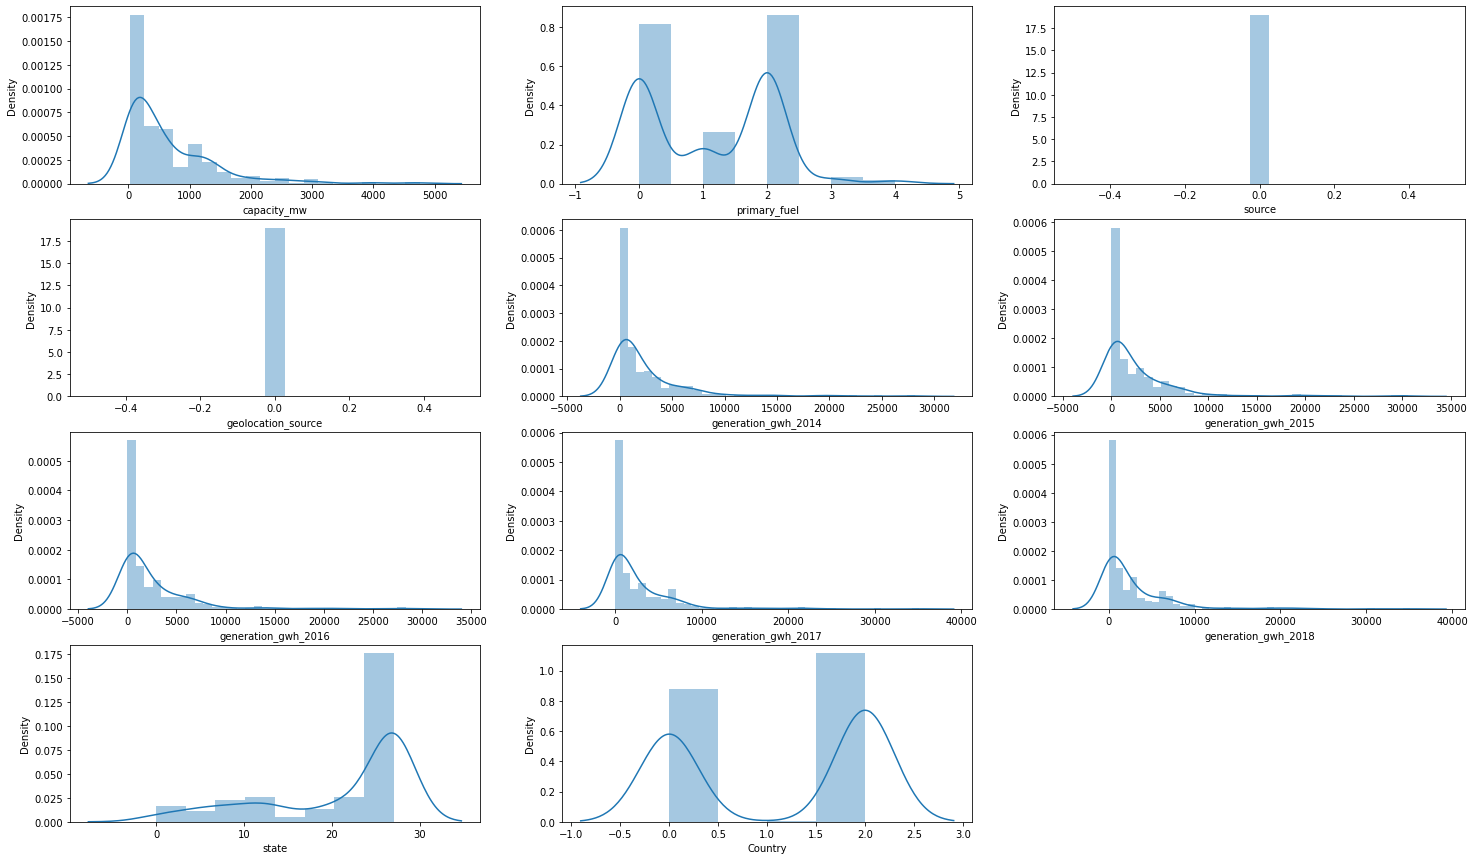

In [409]:
plt.figure(figsize=(25,15))
plotnumber=1

for column in data:
    if plotnumber<=12: #as there are 12 columns in data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

### except capacity_mw  all columns are categorical columns, 
capacity_mw is having skewness so it should be removed in 
1) 1st task of classification



2) In 2nd task regression model this is target column so we will not apply any transformer on it

In [410]:
abs(data.corr()['primary_fuel']).sort_values(ascending=False)

primary_fuel           1.000000
capacity_mw            0.489104
generation_gwh_2017    0.446759
generation_gwh_2018    0.446221
generation_gwh_2016    0.440490
generation_gwh_2015    0.432535
generation_gwh_2014    0.415422
state                  0.055933
Country                0.042455
source                      NaN
geolocation_source          NaN
Name: primary_fuel, dtype: float64

<AxesSubplot:>

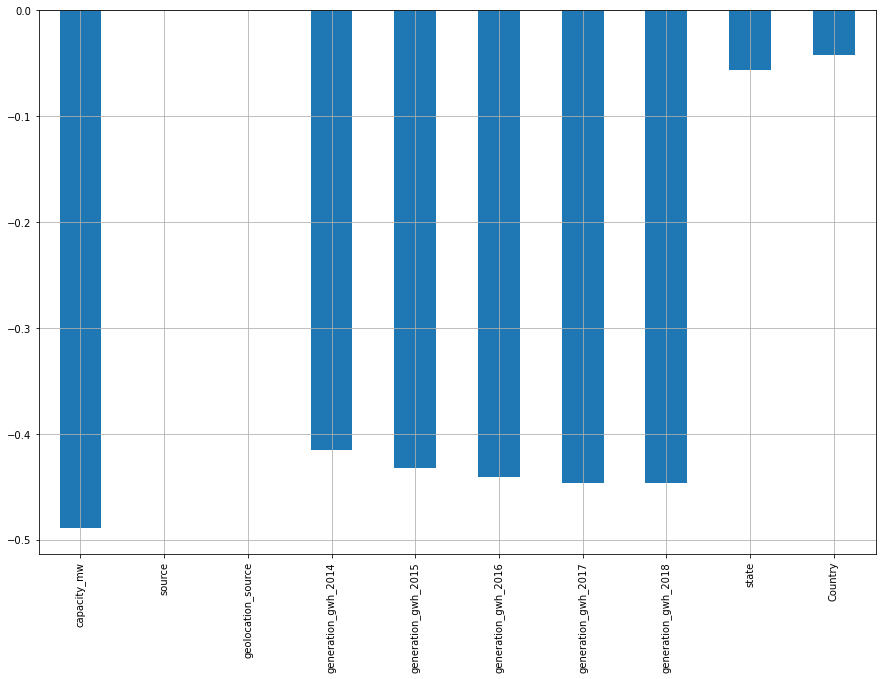

In [411]:
# visualize the correlation
data.drop('primary_fuel', axis =1).corrwith(data['primary_fuel']).plot(kind ='bar',grid = True, figsize = (15,10))
                                       

### two columns are negatively related with target column

<function matplotlib.pyplot.show(close=None, block=None)>

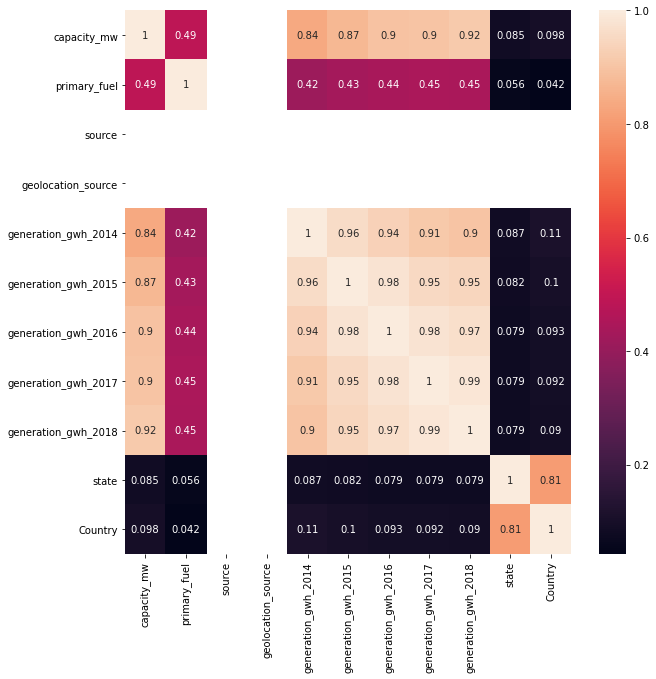

In [412]:
### plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

### there is no multicolinearity problem

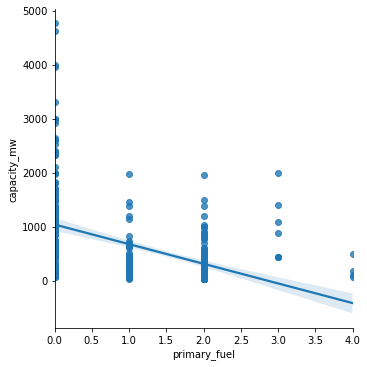

In [413]:
sns.lmplot(y='capacity_mw',x='primary_fuel',data=data)

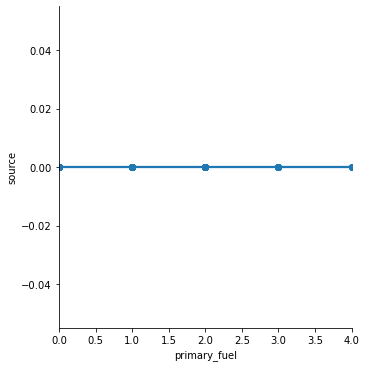

In [414]:
sns.lmplot(y='source',x='primary_fuel',data=data)

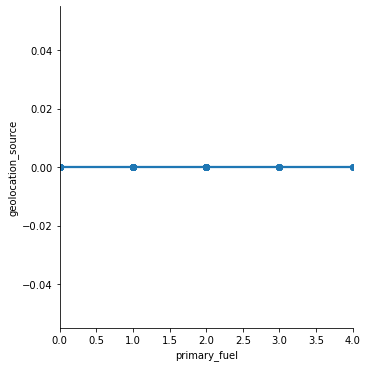

In [415]:
sns.lmplot(y='geolocation_source',x='primary_fuel',data=data)

### outliers checking

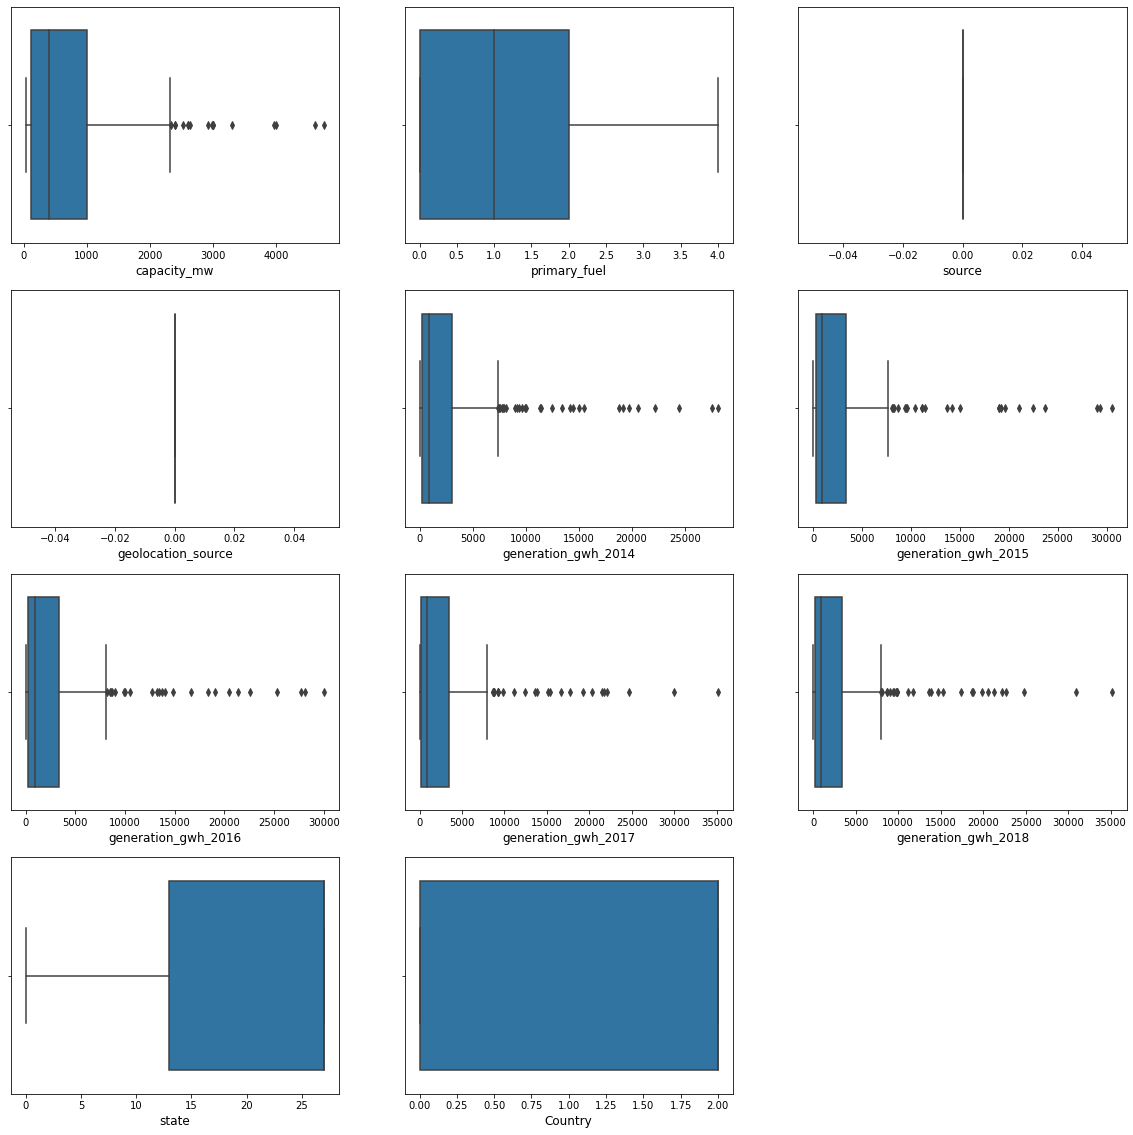

In [416]:
plt.figure(figsize=(20,20))
graph=1

for column in data:
    if graph<=11:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()

#### capacity_mw have outliers it should be removed 

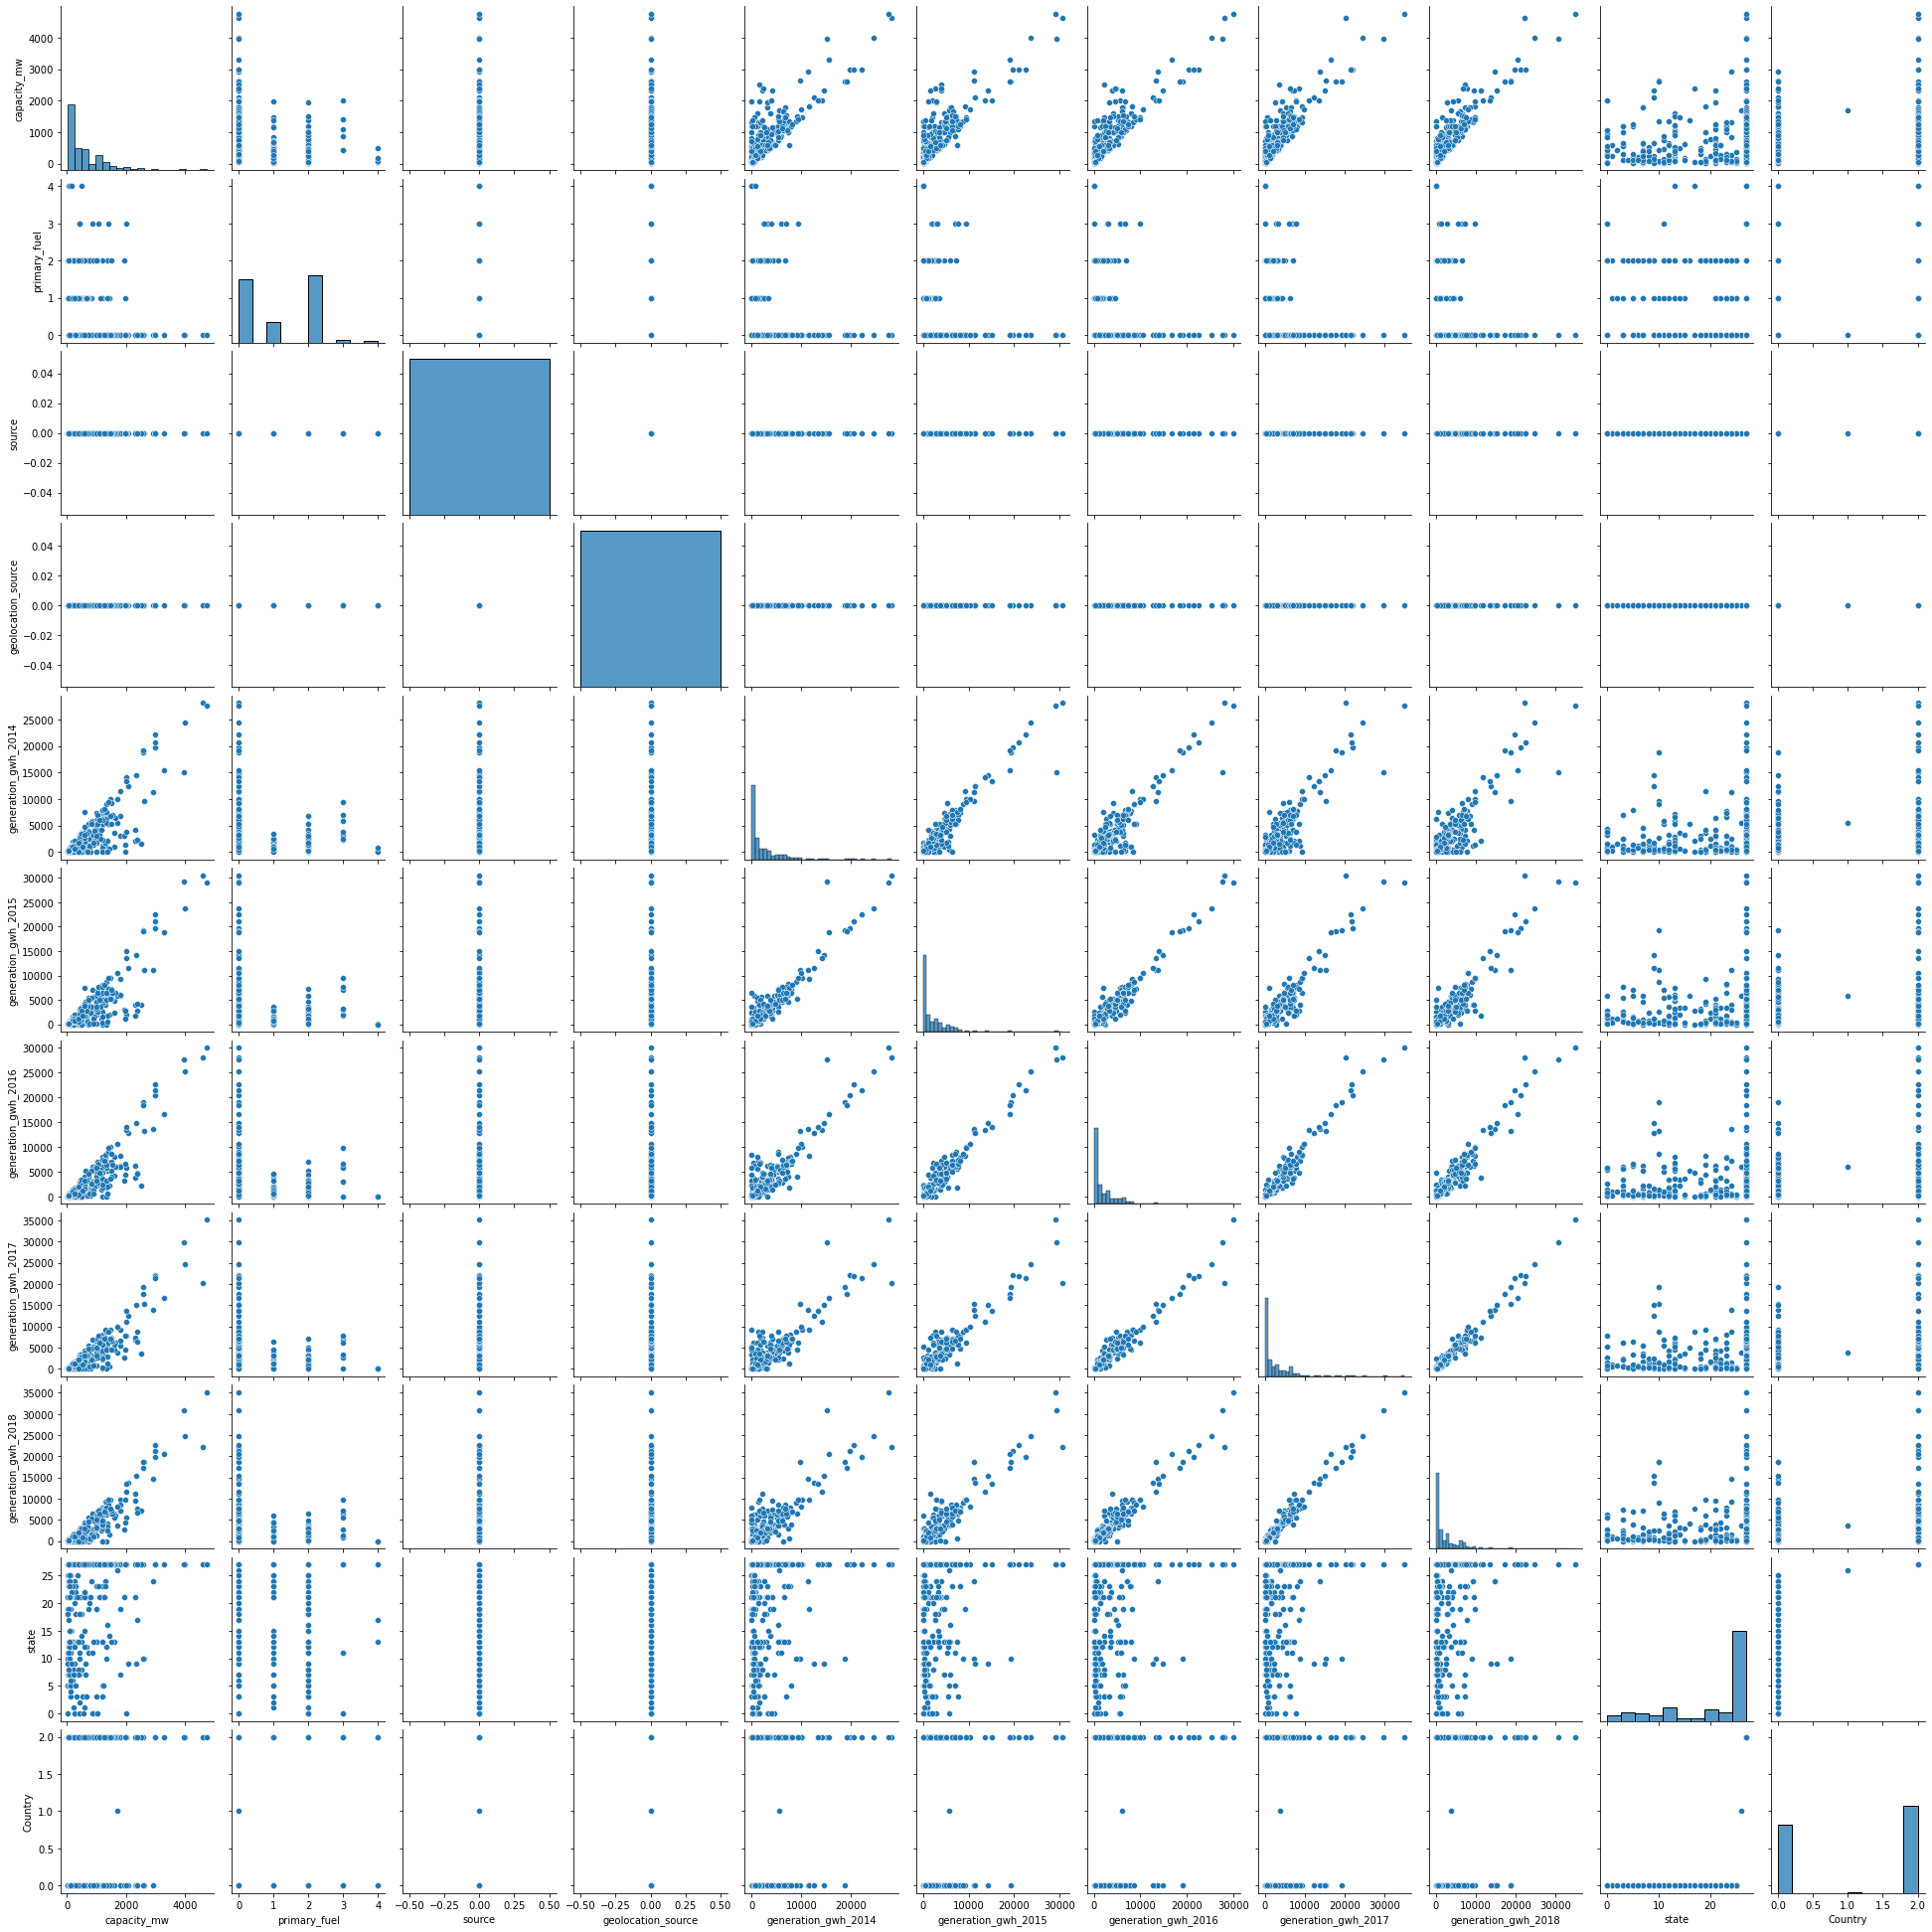

In [417]:
sns.pairplot(data)

#### DATA PREPROCESSING

### not doing outliers removal because of less data

In [418]:
features = ['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features] = pt.fit_transform(data[features].values)
data.head()

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,state,Country
3,-0.718268,1,0,0,-0.229752,-0.087512,-0.045687,-0.192056,-0.235409,21,0
4,1.401713,0,0,0,0.703393,1.152157,1.178553,1.052730,1.251234,7,0
5,-0.251131,0,0,0,0.103050,0.110271,0.106913,0.089284,-0.012716,9,0
6,-1.298598,2,0,0,-0.833464,-0.873062,-1.164631,-1.009847,-1.217689,12,0
7,-0.454010,2,0,0,-0.185373,-0.169844,-0.184881,-0.180528,-0.272614,13,0


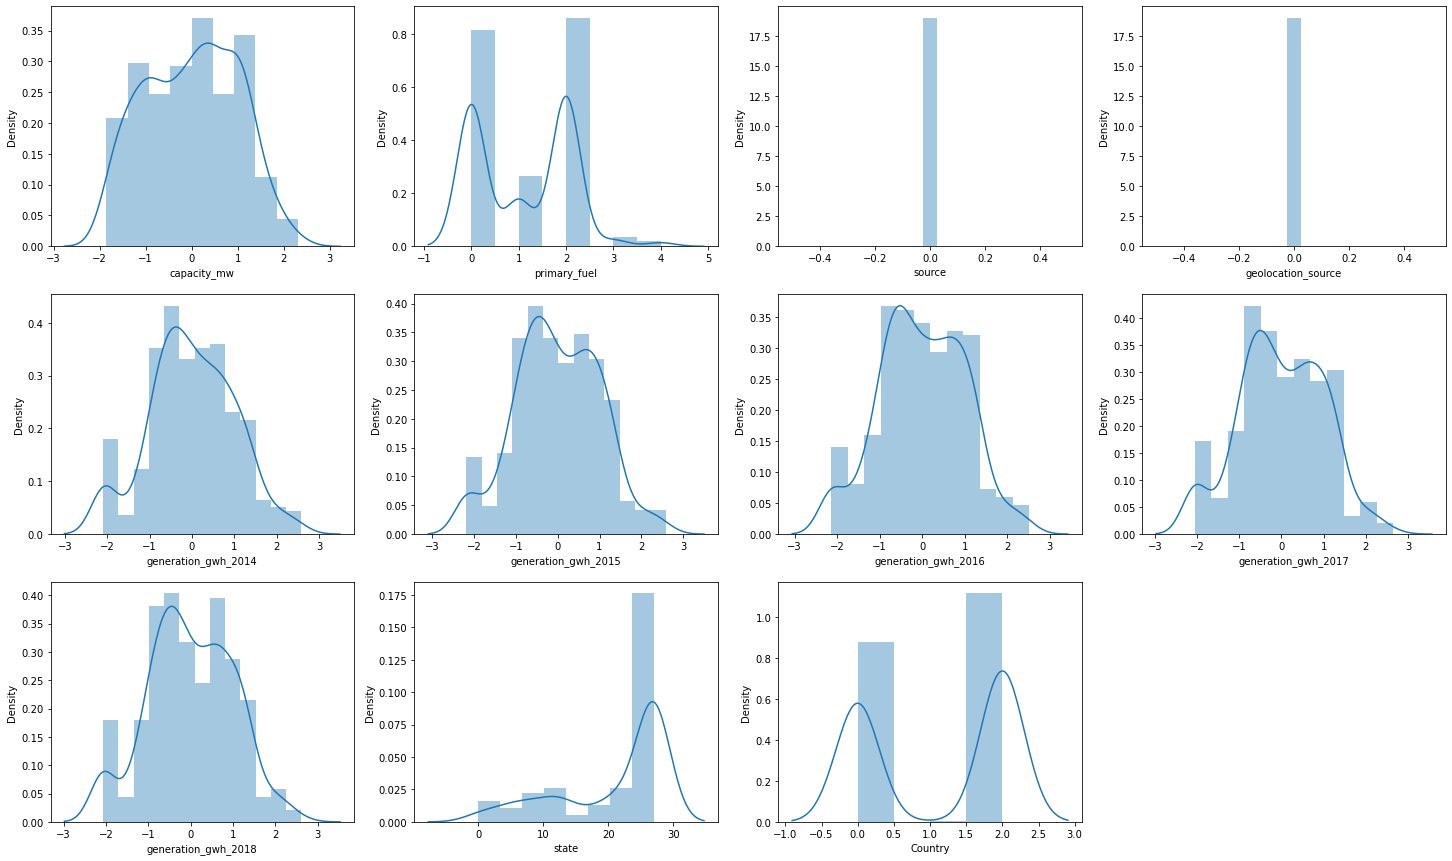

In [419]:
plt.figure(figsize=(25,15))
plotnumber=1

for column in data:
    if plotnumber<=11: #as there are 11 columns in data
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

## Classification model

In [420]:
X_new = data.drop(columns=['primary_fuel'],axis=1)
y_new = data['primary_fuel']

### standard scaler and vif value check

In [421]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_scaled,columns=X_new.columns) 

In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_new.columns

# lets check the vif
vif

,vif,Features
0,2.932766,capacity_mw
1,NaN,source
2,NaN,geolocation_source
3,4.263936,generation_gwh_2014
4,9.865491,generation_gwh_2015
5,19.558068,generation_gwh_2016
6,25.362863,generation_gwh_2017
7,13.878184,generation_gwh_2018
8,2.915135,state
9,2.928011,Country


In [423]:
### thers is multicolinearity problem is data set soo we have to drop it,
data.drop(columns=['generation_gwh_2016','generation_gwh_2015','Country'],axis=1,inplace=True)

In [424]:
data.head()

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,state
3,-0.718268,1,0,0,-0.229752,-0.192056,-0.235409,21
4,1.401713,0,0,0,0.703393,1.052730,1.251234,7
5,-0.251131,0,0,0,0.103050,0.089284,-0.012716,9
6,-1.298598,2,0,0,-0.833464,-1.009847,-1.217689,12
7,-0.454010,2,0,0,-0.185373,-0.180528,-0.272614,13


In [430]:
X_new = data.drop(columns=['primary_fuel'],axis=1)
y_new = data['primary_fuel']

### model training

In [431]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [432]:
import scikitplot as skplt

In [433]:
for i in range(500,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state = i)
    LR.fit(X_train,y_train)
    pred_train = LR.predict(X_train) 
    pred_test = LR.predict(X_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 519 model perform very well
At random state 519
Training accuracy score is 70.12987012987013
Testing accuracy score is 70.12987012987013
At random state 638 model perform very well
At random state 638
Training accuracy score is 68.83116883116884
Testing accuracy score is 68.83116883116884
At random state 675 model perform very well
At random state 675
Training accuracy score is 68.83116883116884
Testing accuracy score is 68.83116883116884
At random state 824 model perform very well
At random state 824
Training accuracy score is 70.12987012987013
Testing accuracy score is 70.12987012987013
At random state 838 model perform very well
At random state 838
Training accuracy score is 70.12987012987013
Testing accuracy score is 70.12987012987013
At random state 870 model perform very well
At random state 870
Training accuracy score is 68.83116883116884
Testing accuracy score is 68.83116883116884
At random state 879 model perform very well
At random state 879
Training accuracy 

### Random_State = 824

In [445]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.10,random_state=824)

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [447]:
LR = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgbt = XGBClassifier()
svc = SVC()

### model 

In [448]:
LR.fit(X_train,y_train)
pred = LR.predict(X_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

74.35897435897436
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.00      0.00      0.00         2
           2       0.71      0.83      0.77        18
           3       0.00      0.00      0.00         1

    accuracy                           0.74        39
   macro avg       0.38      0.40      0.39        39
weighted avg       0.71      0.74      0.72        39

Confusion matrix
 [[14  1  3  0]
 [ 0  0  2  0]
 [ 3  0 15  0]
 [ 0  0  1  0]]


In [449]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,pred_knn)*100)
print(classification_report(y_test,pred_knn))
print('Confusion matrix\n',confusion_matrix(y_test,pred_knn))

66.66666666666666
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.00      0.00      0.00         2
           2       0.65      0.61      0.63        18
           3       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.37      0.36      0.37        39
weighted avg       0.68      0.67      0.67        39

Confusion matrix
 [[15  0  3  0]
 [ 0  0  2  0]
 [ 3  4 11  0]
 [ 0  0  1  0]]


In [450]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

58.97435897435898
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.00      0.00      0.00         2
           2       0.70      0.78      0.74        18
           3       0.00      0.00      0.00         1

    accuracy                           0.59        39
   macro avg       0.35      0.32      0.33        39
weighted avg       0.64      0.59      0.61        39

Confusion matrix
 [[ 9  4  4  1]
 [ 0  0  2  0]
 [ 3  1 14  0]
 [ 1  0  0  0]]


In [451]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

64.1025641025641
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.00      0.00      0.00         2
           2       0.63      0.67      0.65        18
           3       0.00      0.00      0.00         1

    accuracy                           0.64        39
   macro avg       0.36      0.35      0.35        39
weighted avg       0.67      0.64      0.65        39

Confusion matrix
 [[13  1  4  0]
 [ 0  0  2  0]
 [ 3  3 12  0]
 [ 0  0  1  0]]


In [452]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
pred_ada = ada.predict(X_test)
print(accuracy_score(y_test,pred_ada)*100)
print(classification_report(y_test,pred_ada))
print('Confusion matrix\n',confusion_matrix(y_test,pred_ada))

48.717948717948715
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67        18
           3       0.00      0.00      0.00         1

    accuracy                           0.49        39
   macro avg       0.25      0.26      0.19        39
weighted avg       0.46      0.49      0.35        39

Confusion matrix
 [[ 1  1 16  0]
 [ 0  0  2  0]
 [ 0  0 18  0]
 [ 1  0  0  0]]


In [453]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pred_gb = gb.predict(X_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

66.66666666666666
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.00      0.00      0.00         2
           2       0.76      0.72      0.74        18
           3       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.38      0.36      0.37        39
weighted avg       0.71      0.67      0.69        39

Confusion matrix
 [[13  3  2  0]
 [ 0  0  2  0]
 [ 3  2 13  0]
 [ 1  0  0  0]]


In [454]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(X_train,y_train)
pred_xgbt = xgbt.predict(X_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[19:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
64.1025641025641
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.00      0.00      0.00         2
           2       0.80      0.67      0.73        18
           3       0.00      0.00      0.00         1

    accuracy                           0.64        39
   macro avg       0.42      0.35      0.38        39
weighted avg       0.77      0.64      0.70        39

Confusion matrix
 [[13  4  1  0]
 [ 0  0  2  0]
 [ 1  5 12  0]
 [ 1  0  0  0]]


In [455]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_svc))

71.7948717948718
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.00      0.00      0.00         2
           2       0.65      0.83      0.73        18
           3       0.00      0.00      0.00         1

    accuracy                           0.72        39
   macro avg       0.37      0.39      0.37        39
weighted avg       0.68      0.72      0.69        39

Confusion matrix
 [[13  0  5  0]
 [ 0  0  2  0]
 [ 3  0 15  0]
 [ 0  0  1  0]]


### cross validation

In [456]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X_new, y_new, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 68.83116883116882


In [457]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn, X_new, y_new, cv=5)
print("Cross validation score of Knn model is",scr.mean()*100)

Cross validation score of Knn model is 70.64935064935065


In [458]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X_new, y_new, cv=5)
print("Cross validation score of decision tree model is",scr.mean()*100)

Cross validation score of decision tree model is 65.19480519480518


In [459]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X_new, y_new, cv=5)
print("Cross validation score of random forest model is",scr.mean()*100)

Cross validation score of random forest model is 72.46753246753246


In [460]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ada, X_new, y_new, cv=5)
print("Cross validation score of ada boost model is",scr.mean()*100)

Cross validation score of ada boost model is 60.0


In [461]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X_new, y_new, cv=5)
print("Cross validation score of gradient boosting model is",scr.mean()*100)

Cross validation score of gradient boosting model is 70.64935064935065


In [462]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X_new, y_new, cv=5)
print("Cross validation score of xtreme gradient boosting model is",scr.mean()*100)

[19:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [463]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, X_new, y_new, cv=5)
print("Cross validation score of support vector machine model is",scr.mean()*100)

Cross validation score of support vector machine model is 67.53246753246754


### Gridsearchcv

In [464]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'learning_rate': np.arange(0.10,0.13,0.02),
            'min_samples_leaf':range(2,6),
            'min_samples_split':range(2,6),
            'n_estimators':range(10,15,2)
           }
GCV = GridSearchCV(gb,parameter,cv=5,scoring='accuracy')

GCV.fit(X_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(X_test)    #predicting with best parameter 
accuracy_score(y_test, GCV_pred)

0.7692307692307693

In [465]:
GCV.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 12}

In [466]:
import joblib
joblib.dump(GCV.best_estimator_,'Global_powerplant_model.pkl')

['Global_powerplant_model.pkl']

In [467]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Global power plant\Global_powerplant_model.pkl")
y_preds=model.predict(X_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,2
1,0
2,2
3,0
4,2
5,1
6,0
7,0
8,0
9,0


### making regression model:


In [468]:
data.head()

,capacity_mw,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,state
3,-0.718268,1,0,0,-0.229752,-0.192056,-0.235409,21
4,1.401713,0,0,0,0.703393,1.052730,1.251234,7
5,-0.251131,0,0,0,0.103050,0.089284,-0.012716,9
6,-1.298598,2,0,0,-0.833464,-1.009847,-1.217689,12
7,-0.454010,2,0,0,-0.185373,-0.180528,-0.272614,13


In [469]:
X = data.drop(columns=['capacity_mw'],axis=1)
y = data['capacity_mw']

In [470]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

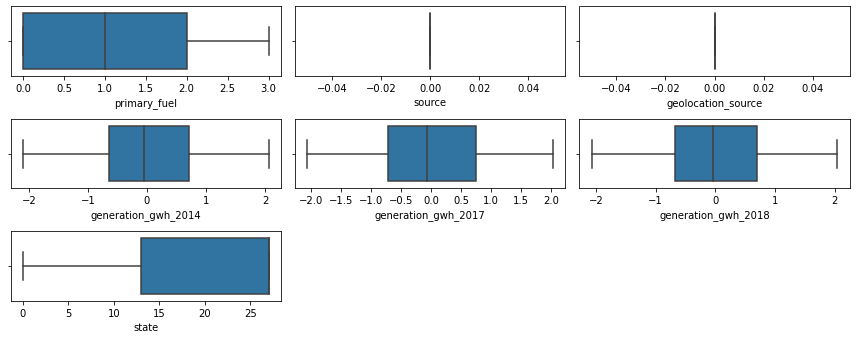

In [471]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
  plt.subplot(13,3,i+1)
  sns.boxplot(X[X_out[i]])
  plt.tight_layout()

In [472]:
x=X

In [473]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

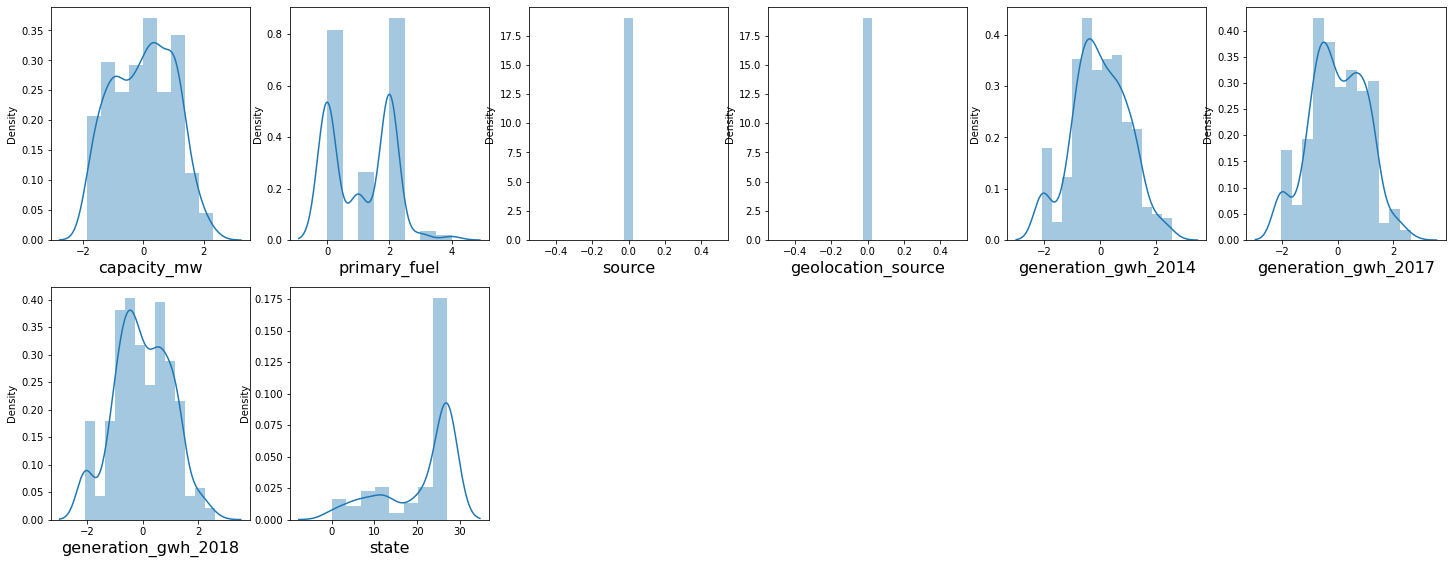

In [474]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=36: #as there are 36 columns in data
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=16)
    plotnumber +=1
plt.show()

In [475]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_scaled,columns=X_new.columns) 

In [476]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_new.columns

# lets check the vif
vif

,vif,Features
0,1.403015,primary_fuel
1,NaN,source
2,NaN,geolocation_source
3,2.867528,generation_gwh_2014
4,16.390740,generation_gwh_2017
5,14.528181,generation_gwh_2018
6,1.003417,state


#### we will apply PCA soo it will take care of multicolinearity

### PCA

In [477]:
X_new

,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,state
0,0.076876,0.0,0.0,-0.249215,-0.217352,-0.256312,-0.192418
1,-1.143640,0.0,0.0,0.710858,1.079227,1.286903,-1.660057
2,-1.143640,0.0,0.0,0.087386,0.066675,-0.032836,-1.521571
3,0.948635,0.0,0.0,-0.845029,-1.015287,-1.214010,-1.267499
4,0.948635,0.0,0.0,-0.204724,-0.205832,-0.293361,-1.170840
...,...,...,...,...,...,...,...
380,0.948635,0.0,0.0,0.360153,0.437515,0.351540,0.769723
381,-1.143640,0.0,0.0,1.334581,1.288673,1.319831,0.769723
382,-1.143640,0.0,0.0,0.031419,-0.008603,-0.052703,0.769723
383,0.948635,0.0,0.0,-0.784714,-0.782452,-0.679561,0.769723


In [478]:
from sklearn.decomposition import PCA

In [482]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_new)

In [483]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [485]:
for i in range(2,6):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_new)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8126091344353135
3 0.9418542326430258
4 0.9932024033420613
5 1.0


In [486]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Training  mean_sqaured_error is',mean_squared_error(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)
        print('Testing mean_sqaured_error is',mean_squared_error(y_test,pred_test)*100)

At random state 66 model perform very well
At random state 66
Training accuracy score is 67.77432893403876
Training  mean_sqaured_error is 32.436345918589815
Testing accuracy score is 67.78010289650082
Testing mean_sqaured_error is 30.84854508999032
At random state 68 model perform very well
At random state 68
Training accuracy score is 67.58666954980303
Training  mean_sqaured_error is 30.663571468990536
Testing accuracy score is 67.56480012758044
Testing mean_sqaured_error is 39.430982667353476
At random state 967 model perform very well
At random state 967
Training accuracy score is 67.72587090442254
Training  mean_sqaured_error is 32.859683623396414
Testing accuracy score is 67.7349681068454
Testing mean_sqaured_error is 29.21466351867296


#### Random_State = 967

In [487]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,SCORERS
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [490]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.10,random_state=843)

75.67499007632152
0.43641814311798954
RMSE : 0.5359921377024384


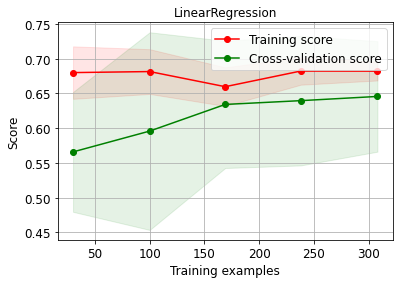

None


In [491]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(lr,X_new,y,cv=5,scoring='r2',text_fontsize='large',title='LinearRegression')
print(plt.show())

### Ridge

75.68454699969438
0.43661532355028837
RMSE : 0.5358868358128395


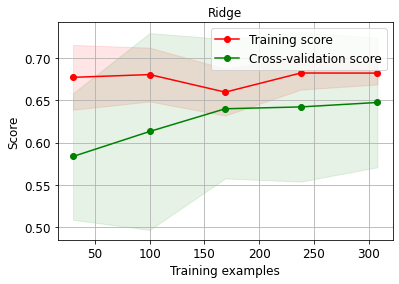

None


In [493]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(ridge,X_new,y,cv=5,scoring='r2',text_fontsize='large',title='Ridge')
print(plt.show())

### RandomForest

90.94565112147053
0.2517500304744203
RMSE : 0.3270096120643829


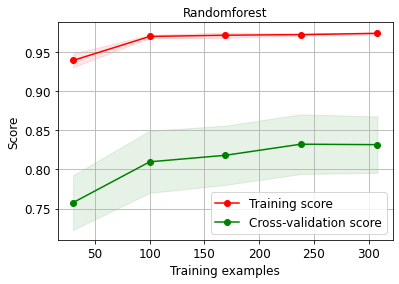

None


In [494]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X_new,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())

87.52455282794602
0.30784168298066844
RMSE : 0.38384860525739944


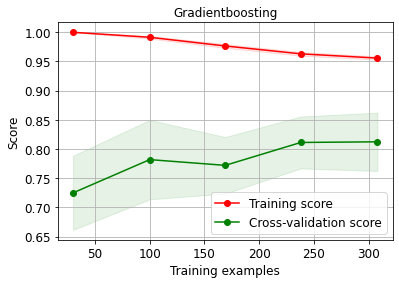

None


In [495]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(gb,X_new,y,cv=5,scoring='r2',text_fontsize='large',title='Gradientboosting')
print(plt.show())

87.56260143801245
0.30679760135032824
RMSE : 0.38326281227864284


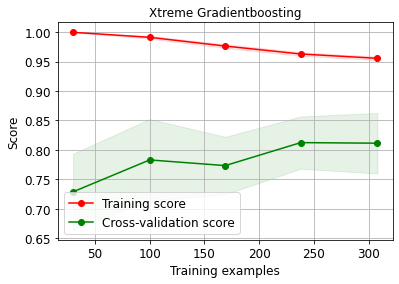

None


In [503]:
from xgboost import XGBRegressor
xgbt = GradientBoostingRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(xgbt,X,y,cv=5,scoring='r2',text_fontsize='large',title='Xtreme Gradientboosting')
print(plt.show())

In [504]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X, y, cv=5)
print("Cross validation score of linear regression model is",scr.mean()*100)

Cross validation score of linear regression model is 63.48939504536525


In [505]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest regression model is",scr.mean()*100)

Cross validation score of Random forest regression model is 83.12457831470311


In [506]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting regression model is",scr.mean()*100)

Cross validation score of gradient boosting regression model is 81.02812444115202


In [507]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting regression model is",scr.mean()*100)

Cross validation score of xtreme gradient boosting regression model is 81.19010866954241


#### best model is Random forest we tune parameter now,

#### Grid searchcv of random forest

In [509]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [530]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=.20,random_state=0)
params = {'n_estimators':range(13,15),
        'max_depth':range(10,15),
        'min_samples_split':range(10,11),
        'min_samples_leaf':[5,6]
        }
GCV2 = GridSearchCV(rf,param_grid = params)
GCV2.fit(x_train,y_train)
print('best_pram', GCV2.best_params_)

rf=GCV2.best_estimator_ #reinstantiating with best params

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('\nR2score =>','\n',r2_score(y_test,y_pred)*100)
print(mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
print('RMSE :', np.sqrt(mse))

best_pram {'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}

R2score => 
 88.80344057797498
0.2762745076197297
RMSE : 0.3530467388335343


#### r2 score increases and RMSE value decreases 

In [531]:
import joblib
joblib.dump(GCV2.best_estimator_,'global_power_plant_regression.pkl')

['global_power_plant_regression.pkl']

In [532]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Global power plant\global_power_plant_regression.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,-1.330746
1,0.238978
2,-0.747064
3,-0.819562
4,0.586757
...,...
72,-1.295779
73,-1.505874
74,-0.308239
75,-1.466058


#### Conclusion - 
1) we have model accuracy of 88.8% after hypertuning the model by gridsearchcv

2) we have applied SMOTE for imbalancing of dataset

3) Random forest is giving best results.

4) Applied PCA for dimesion reduction